# Lab 10

### Main objectives of this tutorial:
1. Learn `Pytorch` syntax and functions in order to be able to create your own networks.
2. Learn about data handling in `PyTorch`
3. Create and train a fully connected network on the MedNIST dataset.
3. Create and train a convolutional neural network on T2w images (2D slices) of the brain.

### Notes:

1. We will work with the MedNIST dataset. This dataset is kindly made available by Dr. Bradley J. Erickson M.D., Ph.D. (Department of Radiology, Mayo Clinic) under the Creative Commons CC BY-SA 4.0 license.
If you use the MedNIST dataset, please acknowledge the source.

2. We will work with data coming from the developing Human Connectome Project (dHCP - http://www.developingconnectome.org/project/)


## Setup

In [ ]:

import matplotlib.pyplot as plt
from PIL import Image

import tarfile
import zipfile
from pathlib import Path

import pandas as pd
import io
import os
import time 

# import urllib

import torchvision
from torchvision import datasets, transforms

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch import nn
from torch.nn import init
from torch.autograd import Variable
from torch.utils.data import DataLoader


## Part 0 - Pytorch fundamentals

*Side note: A lot more details will be presented to you in the Advanced ML class (check PyTorch Foundations lab by Abdulah Fawaz and Cher Bass), but we will cover a few basics together as well.*

[Pytorch Documentation](https://pytorch.org/docs/stable/torch.html)

### Generating random arrays

**Takeaway points:**
* Similar syntax as numpy

**Tasks:**
1. Create a random numpy array of size 1 x 2 x 3 x 3 and a random torch array of the same size
  * Hint: `np.random.rand` and `torch.rand`

In [ ]:
# TODO
np_arr = # numpy
# TODO
tr_arr = # torch

print('numpy\n------')
print('np_arr:\n', np_arr)

print('\n\ntorch\n------')
print('tr_arr:\n', tr_arr)

### Shape

**Takeaway points**: 
* Similar indexing as numpy
* Slightly different reshaping syntax

**Tasks:**
1. Print the shape of your numpy array `np_arr` and the torch tensor `tr_arr`
2. Print the (0,0,0,0) indexed element of both arrays
3. Reshape both arrays to 2 x 9
  * *Hint:* `np.reshape` and `name_of_tensor_variable.reshape`

In [ ]:
# Shape and indexing
print('numpy\n------')
# TODO
               # check shape
# TODO
               # indexing

print('\n\ntorch\n------')
# TODO
               # check shape
# TODO
               # indexing

In [ ]:
# Reshaping
# TODO
np_arr = #
# TODO
tr_arr = #

print('numpy\n------')
print('np_arr.shape:', np_arr.shape)                   # check shape
print('np_arr[0, 0] =', np_arr[0, 0])            

print('\n\ntorch\n------')
print('tr_arr.shape:', tr_arr.shape)                   # check shape
print('tr_arr[0, 0] =', tr_arr[0, 0])            

### Convert from one to another

**Takeaway points**: 
* Converting between numpy and torch tensors is straightforward *from_numpy()* | *numpy()*

**Tasks:**
1. Convert from numpy to torch and back

In [ ]:
# Create a numpy array
x_np = np.random.rand(2, 3)

# Create torch tensor from numpy
# TODO
x_tr = # 

# Create numpy array back from torch tensor
# TODO
x_tr_np = # 

print('numpy\n------')
print('x_np\n', x_np)
print('x_np.shape:', x_np.shape)

print('\n\ntorch\n------')
print('x_tr\n', x_tr)
print('x_tr.shape:', x_tr.shape)

print('\n\nback to numpy\n------')
print('x_tr_np\n', x_tr_np)
print('x_tr_np.shape:', x_tr_np.shape)


### View


**Takeaway points**: 
* This function is quite heavily used in pytorch

**Tasks**:
1. Look at the following code and think about what -1 stands for in `b = a.view(-1, 6)` ?

In [ ]:
# Create a random torch
a = torch.randn(1, 2, 2, 3)

# Reshape
b = a.view(-1, 6)  

print('a\n ', a)
print('\nb\n ', b)

print('\n\na.shape: ', a.shape)
print('b.shape: ', b.shape)

### Concatenating tensors


**Tasks**:
1. Create two random torch arrays of size 1 x 2 x 4 x 4 and size 1 x 5 x 4 x 4 and concatenate them on dim=1 
  * *Hint:* indexing starts from 0
  * https://pytorch.org/docs/stable/generated/torch.cat.html

In [ ]:
# Create two random torch arrays
a =   # TODO
b =   # TODO

c =   # TODO

print('a.shape: ', a.shape)
print('b.shape: ', b.shape)
print('c.shape: ', c.shape)

## Part 1 - Defining and training a network in PyTorch



### Let's create our first PyTorch network

Neural networks can be constructed using the `torch.nn` package.

We will first create a simple feed-forward two layers network.

Creating a network consists of the following steps:
1. Create your class (e.g. `MyFirstNetwork`) by inheriting from `nn.Module`
2. Code up the constructor `__init__` by:
  * Calling `super(MyFirstNetwork, self).__init__()` to call the parent class
  * Coding up all the parameters and layers that make up your network
  * In our first simple case we will have:
    1. One hidden layer going from input of size 1 to output of size 10
    2. One output layer going from size 10 to output of size 1.
    3. One ReLU activation function after the first hidden layer
3. Code up the `forward(self, x)` method which takes the input x, applies the layers on it and outputs the result~




**Acknowledgements**: 
* Inspired from the Advanced Machine Learning class tutorial by Cher Bass and Abdual Fawaz.
* Also check https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html and https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379


In [ ]:
# Create a network
class MyFirstNetwork(nn.Module):
   def __init__(self, n_features, n_hidden, n_output):
       super(MyFirstNetwork, self).__init__()

       self.lin_layer1 = torch.nn.Linear(n_features, n_hidden)
       self.lin_layer2 = torch.nn.Linear(n_hidden, n_output)

   def forward(self, x):
       x = F.relu(self.lin_layer1(x))
       x = self.lin_layer2(x)
       return x

net = MyFirstNetwork(n_features=1, n_hidden=10, n_output=1)
print(net)

### Training the network




#### Optimizer and loss function

In order to train the network we need:

1. An optimizer:
  * For example: `optimizer = torch.optim.SGD(net.parameters(), lr=0.2)`
    * Other optimizers here:  https://pytorch.org/docs/stable/optim.html
2. A loss function:
  * For example: `loss_func = torch.nn.MSELoss()`
    * Other losses here: https://pytorch.org/docs/stable/nn.html#loss-functions

Let's define them below:

In [ ]:
# Optimizer and loss function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)   # we set the learning rate to 0.2
loss_func = torch.nn.MSELoss()

#### Data
We also need some data which we will create below

Tasks:
1. Create a function $y = 3x^3 + x + \epsilon$ where:
  * $\epsilon \in \mathfrak{U}(0, 1) $ 
  * Hint: use `np.random.rand` https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

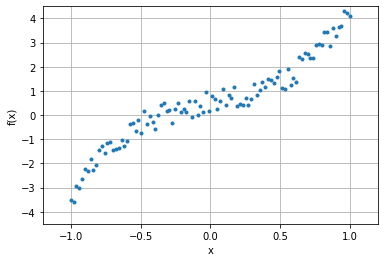

In [ ]:
# We will have 100 samples
N = 100
x = np.linspace(-1, 1, N)
y = # TODO

plt.plot(x, y, '.')
plt.xlim([-1.2, 1.2])
plt.ylim([-4.5, 4.5])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

#### Training steps

A typical training procedure for a neural network is as follows:

1. Define the neural network that has some learnable parameters (or weights)
  * We did this above `MyFirstNetwork`
2. Iterate over a number of epochs and for each epoch iterate over a dataset of inputs
  * We will take all N inputs in our dataset as one batch so we will only iterate through epochs
3. Clear the gradients - this step clears old gradients from the last step (otherwise you would just accumulate the gradients)
  * `optimizer.zero_grad()`
4. Process input through the network
  * `prediction = net(inputs)`
5. Compute the loss (how far is the output from being correct)
  * `loss = loss_func(prediction, outputs)` 
    * Assuming we defined the `loss_func`; we will use Mean Squared Error loss `torch.nn.MSELoss()`
6. Propagate gradients back into the network’s parameters
  * `loss.backward()`
7. Update the weights of the network
  * `optimizer.step()`



***Sidenote:*** Why do we clear the gradients? More info here: https://discuss.pytorch.org/t/why-do-we-need-to-set-the-gradients-manually-to-zero-in-pytorch/4903 and here https://discuss.pytorch.org/t/what-step-backward-and-zero-grad-do/33301

In [ ]:
# First, we will convert our data to PyTorch tensors and reshape them to N x 1
# This means we have a batch of 100 samples of size 1

# convert numpy array to tensor in shape of input size
x = Variable(torch.from_numpy(x.reshape(-1,1)).float())
y = Variable(torch.from_numpy(y.reshape(-1,1)).float())
print('x: ', x.size())
print('y: ', y.size())


x:  torch.Size([100, 1])
y:  torch.Size([100, 1])


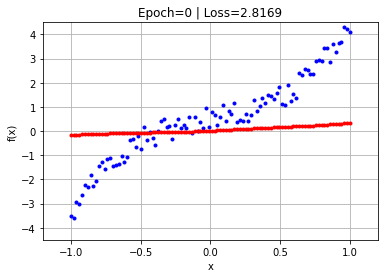

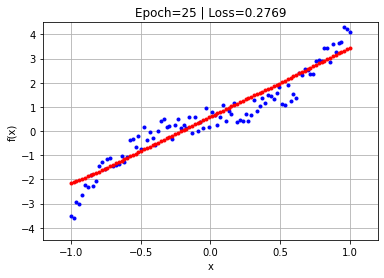

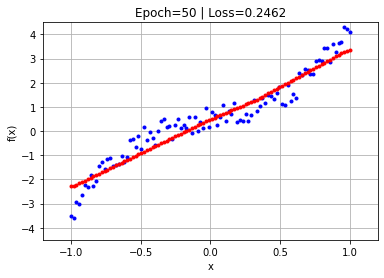

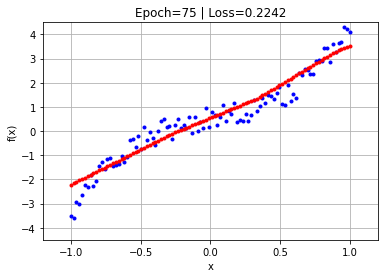

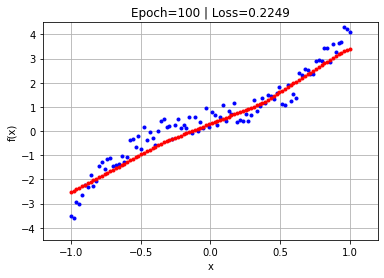

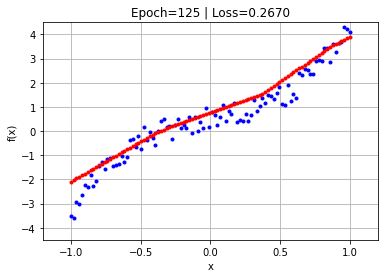

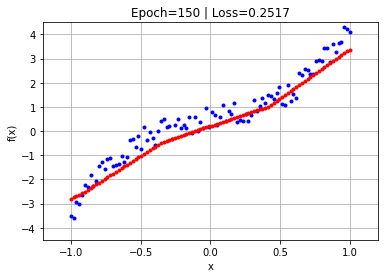

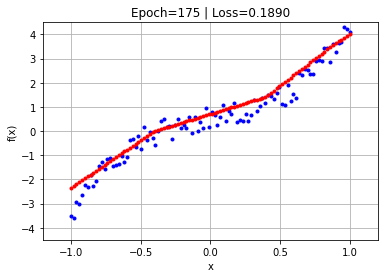

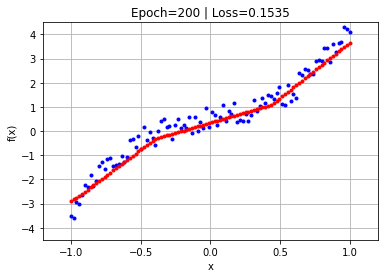

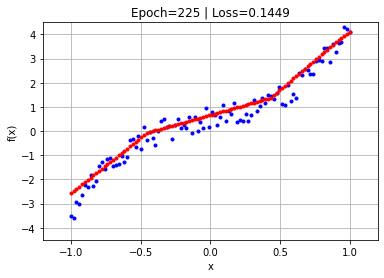

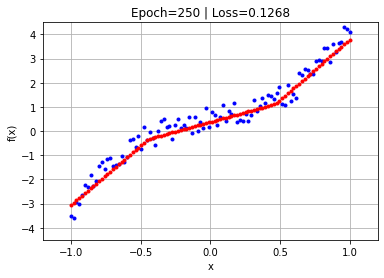

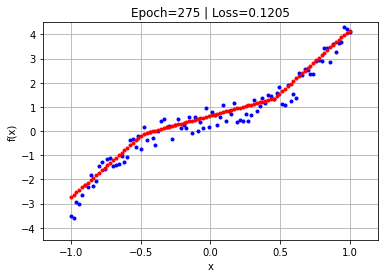

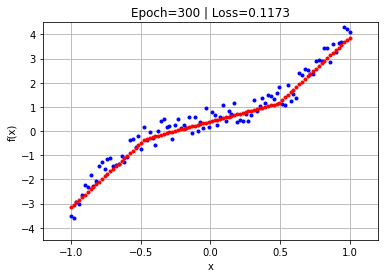

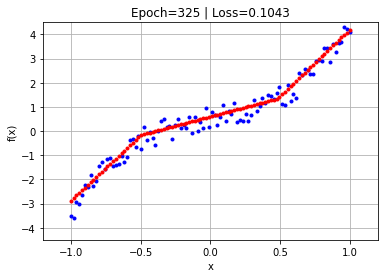

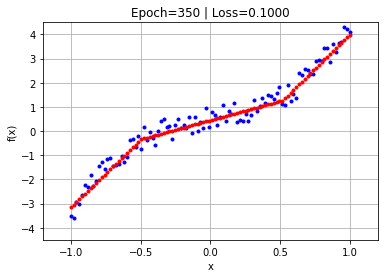

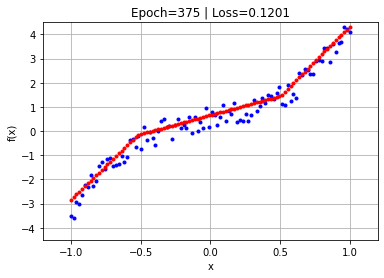

In [ ]:
# Now we can train

# Our input is x
inputs = x 
# Our expected output is y
outputs = y 

# We will train for 400 epochs
epochs = 400

for i in range(epochs):
    
    # 1. Clear gradients 
    optimizer.zero_grad() 
    
    # 2. This is the forward pass (calling the network on the input data)
    prediction = net(inputs) 
    # 3. Compute loss by calling the loss function defined above
    loss = loss_func(prediction, outputs) 
    # 4. Called the backwards pass 
    loss.backward()       
    # 6. Update network parameters
    optimizer.step() 

    # Display results
    if i % 25 == 0:
        # note how we need to tranform data back to numpy
        plt.plot(x.data.numpy(), y.data.numpy(), 'b.', label='real data')
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r.', label='predicted')
        plt.xlim([-1.2, 1.2])
        plt.ylim([-4.5, 4.5])
        plt.grid()
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title(f"Epoch={i} | Loss={loss.data.numpy():.4f}")
        plt.pause(0.1)

## Part 2 - Data manipulation and handling

Data handling is a very important step in a machine learning pipeline, especially when handling medical imaging datasets.

**Takeaway points**: 
* Neural networks are generally trained using batches of data so most of the time your input data will have a certain shape. Some common examples are:
  * Number_of_batches x Number_of_datapoints ***for fully connected networks***
    * example: 16 x 784
  * Number_of_batches x Number_of_channels x Number_of_points_in_x x Number_of_points_in_y ***for 2D convolutional neural networks***
    * example: 16 x 3 x 64 x 64  *for 2D RGB data*
  * Number_of_batches x Number_of_channels x Number_of_points_in_x x Number_of_points_in_y x Number_of_points_in_z ***for 3D convolutional neural networks***
    * example: 2 x 1 x 64 x 64 x 64 *for 3D grayscale data*

* We may want to *augment* the data using random transformations: rotations, translations, adding noise, etc. 
  * We do this to simulate having a larger training dataset
  * Augmentation is generally applied on the training data only -- we leave the test data as it is

* We also want to shuffle the data while training so that the neural network does not learn whether the ordering of our dataset is important

* We may also want to load one item or Number_of_batches of items at one point in time so as to not load the entire dataset into the computer's memory

* Most of these things and more are covered by the `Dataset` and `DataLoader` classes from Pytorch




### Medical MNIST

1. This dataset is known as the MedNIST dataset for radiology and medical imaging. 
2. The images have been gathered from several datasets – at TCIA, the RSNA Bone Age Challenge, and the NIH Chest X-ray dataset.
3. It contains 58954 medical images belonging to 6 classes – ChestCT(10000 images), BreastMRI(8954 images), CXR(10000 images), Hand(10000 images), HeadCT(10000 images), AbdomenCT(10000 images). 
4. Images are in the dimensions of 64×64 pixels. 
5. Dataset size: 75.98 MB

**Information**: 
* We will use a subset of the Medical MNIST which is found at https://www.dropbox.com/s/5wwskxctvcxiuea/MedNIST.tar.gz
* We will select the hand images, the chest CT images, abdomen CT images and the head CT images from this dataset
  * Each class has 10000 images
  * We will use 800 for train, the following 100 for validation and 100 for test

Run the cell below to extract the data in your current directory

In [ ]:
###########################################
# Extracting the MedNIST dataset to the current directory

# Download MedNIST dataset
!curl -L -o MedNISTSmall.tar.gz 'https://github.com/irinagrigorescu/tempmri/raw/main/MedNISTSmall.tar.gz'

# unzip the '.tar.gz' file to the current directory
datafile = tarfile.open("MedNISTSmall.tar.gz")
datafile.extractall()
datafile.close()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   148  100   148    0     0    329      0 --:--:-- --:--:-- --:--:--   330
100 4109k  100 4109k    0     0  4784k      0 --:--:-- --:--:-- --:--:-- 19.5M


### Splitting the data into train / validation / test

We will now divide the data into three separate datasets: one for training, one used for validating our model during training, and one for testing our final model.

* The code below selects 4 classes from our dataset: 'Hand', 'ChestCT', 'HeadCT', 'AbdomenCT'
* It then selects the first 800 from each class for training, the next 100 from each class for validation and the last 100 from each class for testing the model.

In [ ]:
###########################################
# Get data
data_dir = Path('./MedNISTSmall/')
# class_names = sorted([p.stem for p in data_dir.iterdir() if p.is_dir()]) 

# Choose image files from the three classes below
class_names = ['Hand', 'ChestCT', 'HeadCT', 'AbdomenCT']
image_files = [[x for x in (data_dir / class_name).iterdir()] for class_name in class_names]

# Create a training / validation / testing split for the images
# 800 hand + 800 chest + 800 head + 800 abdomen        TRAIN
dataset_train = image_files[0][:800] + image_files[1][:800] + image_files[2][:800] + image_files[3][:800]        

# 100 hand + 100 chest + 100 head + 100 abdomen        VALIDATION
dataset_valid = image_files[0][800:900] + image_files[1][800:900] + image_files[2][800:900] + image_files[3][800:900]

# 100 hand + 100 chest + 100 head + 100 abdomen        TEST
dataset_test  = image_files[0][900:] + image_files[1][900:] + image_files[2][900:] + image_files[3][900:]

# Create a training / validation / testing split for the labels 
labels_train = ["hand"] * 800 + ["chest"] * 800 + ["head"] * 800 + ["abdomen"] * 800 
labels_valid = ["hand"] * 100 + ["chest"] * 100 + ["head"] * 100 + ["abdomen"] * 100 
labels_test = ["hand"] * 100 + ["chest"] * 100 + ["head"] * 100 + ["abdomen"] * 100  

print('train', len(dataset_train), len(labels_train))
print('valid', len(dataset_valid), len(labels_valid)) 
print('test ', len(dataset_test), len(labels_test))

train 3200 3200
valid 400 400
test  400 400



A big part of a deep learning or a machine learning pipeline is preparing the dataset. 
For this, PyTorch provides tools to load, preprocess and even augment your data in order to make it ready for being used by your networks.


Our dataset consists of jpeg files stored under the folder `MedNISTSmall` which we have downloaded previously.
This folder contains 4 subfolders: `AbdomenCT  ChestCT  Hand  HeadCT`

You can see this for yourself by running the next cell.




In [ ]:
!ls -l MedNISTSmall
# !ls MedNISTSmall/Hand

total 160
drwxr-xr-x 2 9364 2008 36864 Nov 30 18:20 AbdomenCT
drwxr-xr-x 2 9364 2008 36864 Nov 30 18:20 ChestCT
drwxr-xr-x 2 9364 2008 36864 Nov 30 18:20 Hand
drwxr-xr-x 2 9364 2008 36864 Nov 30 18:20 HeadCT


***Reminder***

From the splitting we have done above, we also have a list of files names in the following variables
* dataset_train
* dataset_valid
* dataset_test

And for each list of files we have the corresponding label:
* labels_train
* labels_valid
* labels_test

For example: 



In [ ]:
print('Files names')
print(dataset_train[::100])

print('\n\nLabels')
print(labels_train[::100])

Files names
[PosixPath('MedNISTSmall/Hand/002348.jpeg'), PosixPath('MedNISTSmall/Hand/003896.jpeg'), PosixPath('MedNISTSmall/Hand/008608.jpeg'), PosixPath('MedNISTSmall/Hand/003760.jpeg'), PosixPath('MedNISTSmall/Hand/000564.jpeg'), PosixPath('MedNISTSmall/Hand/004842.jpeg'), PosixPath('MedNISTSmall/Hand/007518.jpeg'), PosixPath('MedNISTSmall/Hand/003734.jpeg'), PosixPath('MedNISTSmall/ChestCT/002348.jpeg'), PosixPath('MedNISTSmall/ChestCT/003896.jpeg'), PosixPath('MedNISTSmall/ChestCT/008608.jpeg'), PosixPath('MedNISTSmall/ChestCT/003760.jpeg'), PosixPath('MedNISTSmall/ChestCT/000564.jpeg'), PosixPath('MedNISTSmall/ChestCT/004842.jpeg'), PosixPath('MedNISTSmall/ChestCT/007518.jpeg'), PosixPath('MedNISTSmall/ChestCT/003734.jpeg'), PosixPath('MedNISTSmall/HeadCT/002348.jpeg'), PosixPath('MedNISTSmall/HeadCT/003896.jpeg'), PosixPath('MedNISTSmall/HeadCT/008608.jpeg'), PosixPath('MedNISTSmall/HeadCT/003760.jpeg'), PosixPath('MedNISTSmall/HeadCT/000564.jpeg'), PosixPath('MedNISTSmall/HeadC

### Dataset and dataloaders for the MedNIST dataset

In this part of the tutorial you will learn how to create a custom dataset class. This allows the machine learning engineer to load data on the fly and prepare it for training.

**The Dataset class**

`torch.utils.data.Dataset` is an abstract class representing a dataset. 
The following two methods need to be coded up:

* `__len__` so that len(dataset) returns the size of the dataset.
* `__getitem__` to support the indexing such that dataset[i] can be used to get your ith sample

**Our custom Dataset**

In our custom dataset we will write:
* `__init__` (the constructor of this class) -- here we will store the images and labels file names. Basically, we will be calling MedNISTDataset with different variables for our three different cases (train/validate/test)
  * example: `train_ds = MedNISTDataset(dataset_train, labels_train)` where `dataset_train` and `labels_train` were defined above
  * It also has an optional variable called `transform` which will contain the necessary functions that preprocess each image
* `__len__` only returns the dataset length
* `__getitem__` we will read the image, preprocess it, and transform it into a tensor
  * This method will return a `sample` of our dataset as a dictionary containing` {'image': data, 'label': label}`




For more information check this tutorial:  https://pytorch.org/tutorials/beginner/data_loading_tutorial.html


**Tasks**:

1. Return the length of your dataset inside the method `__len__`
  * Hint: the list of images is stored in `self.images_location`

2. Create a dictionary variable called `sample` with keys *'image'* and *'label'* and values 
  `image_data` and `label_data`

In [ ]:
LABEL_MAPPING = {"hand": 0, "chest": 1, "head": 2, "abdomen": 3}
INV_LABEL_MAPPING = {0: "hand", 1: "chest", 2: "head", 3: "abdomen"}

class MedNISTDataset(torch.utils.data.Dataset): 

  def __init__(self, images_location, labels_location, transform=None):
    """
    Args:
    images_location: paths to the image files
    labels_location: label for each file
    """
    self.images_location = images_location
    self.labels_location = labels_location
    self.transform = transform

  def __len__(self):       
    """
    Number of samples inside the dataset
    Returns: length of dataset
    """
    return    # TODO

  def __getitem__(self, idx):
    """
    Select an individual sample from the dataset

    Args:
      index: index of sample to draw

    Return:
      Dict[str, torch.Tensor]: single sample
        * `image`: image data
        * `label`: label for sample
    """
    # Get name of image
    image_name = self.images_location[idx] 

    # Get corresponding label
    label_name = self.labels_location[idx] 

    # Load files
    image_data = np.array(Image.open(image_name))
    label_data = LABEL_MAPPING[label_name]

    # Create sample
    sample =   # TODO

    # Transform sample
    if self.transform:
        sample = self.transform(sample)
    
    return sample


### Custom transforms for the dataset

The class created above will now give you an image and a label.
However, a few preprocessing steps are needed.

First, the images might be of different sizes and that can lead to problems when training a network which expects a similar sized input data point each time.
The image could also be too big to fit in memory and each data point could have intensity values that vary too wildly (one image could have values between 0 and 1 and another between 0 and 255).

Some of these preprocessing steps can be done beforehand; meaning, you can preprocess your dataset (scaling, cropping, intensity normalisation) and store it in a folder, but PyTorch also allows you to do this one the fly.

The following classes (`Rescale`, `Normalise`, `ToTensor`) expect as input a sample from your dataset. 
More specifically, they expect to receive as input a dictionary of the form:
  * `{'image': image_data, 'label': label_data}`
They then preprocess this input data and output a similar dictionary:
  * `{'image': preprocessed_image_data, 'label': preprocessed_label_data}`
  * Sometimes you only want to preprocess the image data, but leave the label as it is. In that case the output dictionary will leave the label data unchanged: `{'image': preprocessed_image_data, 'label': label_data}`


**Tasks:**

1. `Rescale`
  * Resize the input image to a new size determined by the `new_h`, `new_w` variables.
    * Hint: Inside `Rescale` class's `__call__` method use Skimage's function `transform.resize(array, (new_size_x, new_size_y)` https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize

2. `Normalise`
  * Normalie the image data (leave the label unchanged) between [self.min, self.max]
    * Hint: https://stats.stackexchange.com/a/178629

3. `ToTensor`
  * Transform the image data from numpy into a PyTorch tensor (the label data has been done for you)
  * Bonus: What does `None` do on this line?
    * `sample = {'image': img_torch[None].float(), 'label': lab_torch.long()}`


In [ ]:
from skimage import transform


class Rescale(object):
  """
  Rescale the image in a sample to a given size.

  Args:
      output_size (tuple or int): Desired output size
  """

  def __init__(self, output_size=(32, 32)):
      assert isinstance(output_size, (tuple))
      self.output_size = output_size

  def __call__(self, sample):
    image, label = sample['image'], sample['label']

    # Get current size of the image
    h, w = image.shape[:2]

    # new size of image is stored in output_size
    new_h, new_w = self.output_size
    new_h, new_w = int(new_h), int(new_w)

    # Rescale image
    img = # TODO

    return {'image': img, 'label': label}


class Normalise(object):
  """
  Normalise the intensities in an image to min_ -> max_
  """
  def __init__(self, min_=0, max_=1):
    self.min = min_
    self.max = max_

  def __call__(self, sample):
    image, label = sample['image'], sample['label']

    # Normalise between  [self.min, self.max]
    image = # TODO

    # Create sample
    sample = {'image': image, 
              'label': label}  

    return sample


class ToTensor(object):
  """
  Convert ndarrays in sample to Tensors.
  """

  def __call__(self, sample):
    image, label = sample['image'], sample['label']

    # PyTorchify
    img_torch = # TODO 
    lab_torch = torch.tensor(label)

    # Create sample of tensors here:
    sample = {'image': img_torch[None].float(), 
              'label': lab_torch.long()}

    return sample

### Create training / validation / test loaders

We are now ready to put everything together and have a train / validation / test datasets.

Check and run the code below.

***Reminder:***
The `MedNISTDataset` takes as input a list of file locations for the images (e.g. dataset_train), a list of labels (e.g. labels_train) and an optional transform.
In our case we call `transforms.Compose` from `torchvision` in order to compose the transformations we defined above:
  `transforms.Compose([Normalise(), Rescale(), ToTensor()])`

We then do the same for the validation dataset and the test dataset.

In [ ]:
# Train / validation / test datasets
train_ds = MedNISTDataset(dataset_train, labels_train, 
                          transforms.Compose([Normalise(), Rescale(), ToTensor()]))
valid_ds = MedNISTDataset(dataset_valid, labels_valid, 
                          transforms.Compose([Normalise(), Rescale(), ToTensor()]))
test_ds = MedNISTDataset(dataset_test, labels_test, 
                         transforms.Compose([Normalise(), Rescale(), ToTensor()]))

We then use these datasets with `torch.utils.data.DataLoader` which takes as input:
* dataset: dataset from which to load the data (dataset of type torch.utils.data.dataset.Dataset -- which we defined above)
* batch_size:  how many samples per batch to load (default: 1)
* shuffle: True | False depending on whether you want your data to be shuffled
* num_workers: how many subprocesses to use for data loading. 0 means that the data will be loaded in the main process.
* ...


More info here: https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader


**Tasks**:
1. Run the code below and check the sizes of the training data
  * For the `image_train.shape: torch.Size([8, 1, 32, 32])` example, what does 8 stand for? What about 1? 

In [ ]:
# Dataloader properties
batch_size = 8

# Train / validation / test dataloaders
dataloaders = {
    "train": torch.utils.data.DataLoader(train_ds,
                                         batch_size=batch_size, 
                                         shuffle=True,
                                         num_workers=8),
    "valid": torch.utils.data.DataLoader(valid_ds,
                                         batch_size=batch_size, 
                                         shuffle=True,
                                         num_workers=8),
    "test": torch.utils.data.DataLoader(test_ds,
                                        batch_size=1, 
                                        shuffle=False,   
                                        num_workers=1)
}


# Let's check the training dataloader
for i, batch in enumerate(dataloaders["train"]):
  image_train, label_train = batch['image'], batch['label']
  print('\n\nimage_train.shape', image_train.shape)
  print('label_train.shape', label_train.shape)
  print('plot image')

  plt.imshow(image_train[0,0])
  # plt.title(label_train[0])
  plt.title(INV_LABEL_MAPPING[int(label_train[0].numpy())])
  plt.colorbar()
  plt.show()

  print('...')

  # Break the loop early as we only want to look at a few examples:
  if i > 3:
    break

## Part 3 - Fully Connected Networks



### Creating a fully connected network in PyTorch

We are now ready to put together Parts 1 and 2: create a fully connected network and train it on the MedNIST dataset using the dataloaders we created above.

__Tasks:__ 

1. Create a `FullyConnectedNetwork` model with:
  * one linear layer that goes from 1024 to 64
    * 1024 is the input size because our images are 32x32. We vectorise them and feed this 1D vector as input to the network
  * a second linear layer from 64 to n_classes (n_classes will be 4 because we have 4 classes in our dataset)
  * a softmax layer
    * Hint: You need to give it dim = 1 because you want the softmax to be applied across the features instead of the batches https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html

2. In the `forward` method do the following:
  * reshape your input data
    * Because your input data will be of size `N_batches x N_channels x 32 x 32` (remember that for grayscale data N_channels is 1) so the first thing to do is to reshape the input data to `N_batches x N_features`
    * Hint: `view(...)`  Check *Part 0 - View* and more info here: https://pytorch.org/docs/stable/tensors.html
  * Apply the first linear layer, followed by a ReLU activation, then the second layer and then apply a Softmax




In [ ]:
# In case you have a GPU it will run the network on the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# This method initializes the weights of the network
def init_weights(net):
  """
  Initialise weights of the network
  """
  def init_func(m):
    classname = m.__class__.__name__
    if hasattr(m, 'weight') and (classname.find('Conv') != -1 or classname.find('Linear') != -1):
      init.kaiming_normal_(m.weight, mode='fan_out')
      if hasattr(m, 'bias') and m.bias is not None:
        init.constant_(m.bias, 0.0)
    elif classname.find('BatchNorm2d') != -1:
      init.constant_(m.weight, 1.0)
      init.constant_(m.bias, 0.0)
    
    print('Network initialized with kaiming_normal_.')
    net.apply(init_func)

# Your fully connected network
class FullyConnectedNetwork(nn.Module):
    
    def __init__(self, n_classes=4):
        super(FullyConnectedNetwork, self).__init__()
        
        self.fc1 = # TODO
        self.fc2 = # TODO
        self.softmax =  # TODO

        init_weights(self)
        
    def forward(self, x): 
        # Flatten the MedMNIST images to a 32*32 feature vector 
        # remember that each image was rescale to a 32 x 32 size
        x = # TODO

        x = # TODO
        x = # TODO

        return x

# After we have defined our model we load it onto our device
model = FullyConnectedNetwork().to(device) 

### Train the network

**Tasks:**

1. Set your training variables:
  * 10 epochs, a learning rate of 0.01

2. Create your loss function: we will be using the `CrossEntropyLoss`
  * https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss

3. Create your optimizer:
  * Use Stochastic Gradient Descent

4. In the training phase do the following:
  1. Clear the gradients
  2. Process input through the network  
  3. Compute the loss between prediction and ground truth
  4. Propagate gradients back into the network’s parameters  
  5. Update the weights of the network


If it's too slow remember that you can change the Runtime type to GPU in Google Colab

In [ ]:
#####################################################
# Variables for train
n_epochs = # todo
learning_rate = # todo
to_plot = True

loss_function =  # todo
optim =  # todo
        
# Metrics to store during training
metrics = {'loss_train': [], 'loss_valid': [],
           'acc_train': [], 'acc_valid': []}

# Go through each epoch
#####################################################
for epoch in range(0, n_epochs):

  # Print learning rate for each epoch -- good for when you have a LR scheduler
  lr = optim.param_groups[0]['lr']
  print('LEARNING RATE = %.7f' % lr)

  # Save time to calculate how long it took
  start_time = time.time()

  # Set plotted to false at the start of each epoch
  plotted = False

  # Append emtpy list so that each epoch has a list of values
  for key_ in metrics.keys():
    metrics[key_].append([])

  # Go through each phase TRAIN/VALID
  #####################################################  
  for phase in ['train', 'valid']:

    # Go through each data point in either train or validation
    #####################################################  
    for i, data_point in enumerate(dataloaders[phase]):
      
      # Calculates step
      length_dataloader = len(dataloaders[phase])
      step = epoch * length_dataloader + i + 1

      # Fetch batch of data
      ##################################################
      # Image data
      img_input = Variable(data_point['image']).to(device)
      
      # Label data
      lab_gt = Variable(data_point['label']).to(device)

      # TRAIN
      ##################################################
      if phase == 'train':
        # 1) Set optimiser to zero grad
        # todo

        # 2) Forward pass through network
        prediction =   # todo  

        # 3) Calculate loss
        current_loss =   # todo

        # Store metrics
        metrics['loss_train'][-1].append(current_loss.item())
        accuracy = sum([1 for x,y in 
                        zip(np.argmax(prediction.cpu().data.numpy(), axis=1), 
                            lab_gt.cpu().data.numpy()) if x == y]) / lab_gt.shape[0]
        metrics['acc_train'][-1].append(accuracy * 100.)     
        
        # 4) Perform backward pass
        # todo   

        # 5) Update weights
        # todo

      # Validate
      ##################################################
      if phase == 'valid':
        model.eval()

        # Prediction is done without gradients
        with torch.no_grad():
          prediction_val = model(img_input)

          # Calculate loss
          current_loss = loss_function(prediction_val, lab_gt)

          # Store metrics
          metrics['loss_valid'][-1].append(current_loss.item())
          accuracy = sum([1 for x,y in 
                        zip(np.argmax(prediction_val.cpu().data.numpy(), axis=1), 
                            lab_gt.cpu().data.numpy()) if x == y]) / lab_gt.shape[0]
          metrics['acc_valid'][-1].append(accuracy * 100.)     

          # Plot once in a while
          if to_plot and epoch % 5 == 0 and plotted is False:
            plt.imshow(img_input.cpu().data.numpy()[0, 0], cmap='Greys_r')
            title  = f"Pred: {np.argmax(prediction_val.cpu().data.numpy()[0])} | "
            title += f"Gt: {lab_gt.cpu().data.numpy()[0]}"
            plt.title(title)
            plt.colorbar()
            plt.xticks([])
            plt.yticks([])
            plt.show()

            plotted = True

      # PRINT STATS
      ###################################################
      if i % 50 == 0:
        time_elapsed = time.time() - start_time
        print("%s Epoch: (%3d) (%5d/%5d) (%3d) | Loss:%.2e | %.0fm %.2fs" %
              (phase.upper(), epoch, i + 1, length_dataloader, step,
              current_loss.item(), time_elapsed // 60, time_elapsed % 60))
        
      # if i > 5:
      #   break


### Let's plot the losses

**Tasks:**
1. Call the `plot_losses_metrics()` on the metrics dictionary to plot the losses

In [ ]:
#############################################
def plot_losses_metrics(metrics_):
  ###############
  keys_ = metrics_.keys()
  n_subplots_ = len(keys_) // 2
  n_epochs_ = len(metrics_[list(keys_)[0]])

  # Plot
  plt.figure(figsize=(12, 4))

  ###############
  idx = 0
  for key_ in keys_:
    if 'train' in key_:
        # Plot training / validation curves in the first subplot
        plt.subplot(1, n_subplots_, idx + 1)
        idx += 1

        # Train
        plt.plot(np.arange(0, n_epochs_), 
                [np.mean(x) for x in metrics_[key_]], 'r-', label=key_)
        plt.fill_between(np.arange(0, n_epochs), 
                [np.mean(x)+np.std(x) for x in metrics_[key_]],
                [np.mean(x)-np.std(x) for x in metrics_[key_]], color='red', alpha=0.1)
        # Validation
        val_key = key_.split('_train')[0]+'_valid'
        plt.plot(np.arange(0, n_epochs), 
                [np.mean(x) for x in metrics_[val_key]], 'b-', label=val_key)
        plt.fill_between(np.arange(0, n_epochs), 
                [np.mean(x)+np.std(x) for x in metrics_[val_key]],
                [np.mean(x)-np.std(x) for x in metrics_[val_key]], color='blue', alpha=0.1)
        plt.legend()
        plt.xlabel('epochs')
        plt.ylabel(key_.split('_train')[0])

  plt.show()

# Call the plotting function
# TODO

### Let's test our model on the test dataset



In [ ]:
##################################################
# A little dictionary for me to store the accuracy for each label type
metrics = {'acc': 0}
metrics.update({k+'_gt' : 0 for k in LABEL_MAPPING})  # ground truth labels
metrics.update({k+'_pr' : 0 for k in LABEL_MAPPING})  # predicted labels

print(LABEL_MAPPING)
print(INV_LABEL_MAPPING)
print(metrics)

{'hand': 0, 'chest': 1, 'head': 2, 'abdomen': 3}
{0: 'hand', 1: 'chest', 2: 'head', 3: 'abdomen'}
{'acc': 0, 'hand_gt': 0, 'chest_gt': 0, 'head_gt': 0, 'abdomen_gt': 0, 'hand_pr': 0, 'chest_pr': 0, 'head_pr': 0, 'abdomen_pr': 0}


**Tasks:**

1. For loop through the 'test' dataset usind the `dataloaders` variable defined above
  * *Hint:* Similar syntax as when training, but the key of this dictionary will be different

In [ ]:
labels_true = []
labels_pred = []

##################################################
# Predict with the trained model on the test dataset
for ... # TODO

  # Image data
  img_input = Variable(data_point['image']).to(device)
  # Label data
  lab_gt = data_point['label'].numpy()[0]
  
  # Accumulate every time we encounter a type of label
  metrics[INV_LABEL_MAPPING[lab_gt]+'_gt'] += 1

  # Prediction
  with torch.no_grad():
    prediction_val = model(img_input)
    prediction_val = np.argmax(prediction_val.cpu().data.numpy(), axis=1)[0]

    # Store metrics
    accuracy = 1 if lab_gt == prediction_val else 0
    metrics['acc'] += accuracy
    labels_true.append(lab_gt)
    labels_pred.append(prediction_val)

    # Store if correct:
    if lab_gt == prediction_val:
      metrics[INV_LABEL_MAPPING[lab_gt]+'_pr'] += 1
    

print('Total test accuracy: ', metrics['acc'] / len(dataloaders['test']) * 100., '%')

for k_ in LABEL_MAPPING.keys():
  print(k_, metrics[k_ + '_pr'] / metrics[k_ + '_gt'] * 100., '%')

print('\n\nTrue      labels: ', labels_true[::20])
print('Predicted labels: ', labels_pred[::20])


**Tasks**

1. Use the sklearn `confusion_matrix` function to calculate the confusion matrix on the `true_labels` and `pred_labels`
2. Use the plotting function to plot this confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(c_mat, title_name):
    '''
    Function which plots the confusion matrix
    
    INPUT:
    :param c_mat, where Cij = number of observations
                              known to be in group i and 
                              predicted to be in group j
    '''
    plt.figure(figsize=(7,7))
    plt.imshow(c_mat, cmap='viridis')
    plt.xticks(np.arange(0, c_mat.shape[0]), LABEL_MAPPING.keys())
    plt.yticks(np.arange(0, c_mat.shape[0]), LABEL_MAPPING.keys())
    plt.colorbar()

    for i in np.arange(0, c_mat.shape[0]):
      for j in np.arange(0, c_mat.shape[0]):
        if i == j:
          plt.text(i-0.1, j, c_mat[j][i], fontsize=12, color='black')
        else:
          plt.text(i-0.1, j, c_mat[j][i], fontsize=12, color='white')
    
    plt.xlabel('predicted')
    plt.ylabel('actual')
    
    plt.title('Confusion matrix for ' + title_name)
    
    plt.show()
    
# Calculate the confusion matrix
conf_mat = # todo
print(conf_mat)

# Plot the confusion matrix
# todo


## Part 4 - Convolutional Neural Networks

### dHCP Data

For the 2D convolutional neural network we will be using 2D axial slices of T2w MRI images of neonates as part of the developing Human Connectome Project

Run the code below to extract the data.



In [ ]:
###########################################
# Extracting the dHCP dataset to the current directory

# Download MedNIST dataset
!curl -L -o data.zip 'https://github.com/irinagrigorescu/tempmri/raw/main/mrimages.zip'

# unzip the '.zip' file to the current directory
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
  zip_ref.extractall()

!ls 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141  100   141    0     0    214      0 --:--:-- --:--:-- --:--:--   214
100 6300k  100 6300k    0     0  6351k      0 --:--:-- --:--:-- --:--:-- 6351k
data_test.csv	data_valid.csv	MedNISTSmall	     mridata
data_train.csv	data.zip	MedNISTSmall.tar.gz  sample_data


This dataset has both T2w images and corresponding tissue segmentations.
They are called `imgNumber_t2w.jpg` and `imgNumber_lab.jpg`

Run the code below to see:

In [ ]:
!ls mridata | head

It is similar as before, the only difference now is that instead of having a list of image names, we now have 3 .csv files:

1. data_train.csv  - data used for training
2. data_valid.csv  - data used for validation
3. data_test.csv   - data used for test

Example below:


In [ ]:
!ls  | grep csv



Each file looks like this:
```
image_name,ga_birth,pma_scan
0_t2w.jpg,41.0,41.14285714
10_t2w.jpg,39.14285714,39.57142857
20_t2w.jpg,42.0,42.28571429
...
```

Example below:

In [ ]:
! cat data_test.csv | head

### Custom dataloaders for our dHCP dataset

We will have to create a Dataset class for our new data.
Check the code below and look for:

1. The constructor now receives a csv_file (one of the data_train|valid|test.csv files) and reads it in using Pandas
  * `self.data_file = pd.read_csv(csv_file)`

2. The `__getitem__` method will have to first read a row from the Pandas dataframe which is stored in `self.data_file`
  * Reads the image name from the idx row at column 0 (where we have the filename stored)
  * Reads the age at birth and at scan from the idx row at columns 1 and 2
  * Loads the files in using `Image.open` and transforms them into numpy arrays
  * Creates the sample and calls the optional transform method

In [ ]:
class DHCPDataset(torch.utils.data.Dataset): 

  def __init__(self, csv_file, folder_input='mridata/', transform=None):
    """
    Args:
    csv_file: a csv file with image name | age at birth | age at scan
    """
    self.data_file = pd.read_csv(csv_file)
    self.folder_input = folder_input
    self.transform = transform

  def __len__(self):       
    """
    Number of samples inside the dataset
    Returns: length of dataset
    """
    return len(self.data_file)

  def __getitem__(self, idx):
    """
    Select an individual sample from the dataset

    Args:
      index: index of sample to draw

    Return:
      Dict[str, torch.Tensor]: single sample
        * `image`: image data
        * `seg`: segmentation data
        * `ga_birth`: age at birth
        * `ga_scan`: age at scan
    """
    # Reads from the idx row at column 0 (where we have the filename stored)
    image_name = os.path.join(self.folder_input, self.data_file.iloc[idx, 0])
    # Same as before but concatenates the _lab.jpg suffix to the filename
    lab_name = os.path.join(self.folder_input, self.data_file.iloc[idx, 0].split('_t2w')[0] + '_lab.jpg')
    # Age at birth and age at scan are on the second and third columns
    baby_age_birth = self.data_file.iloc[idx, 1]
    baby_age_scan = self.data_file.iloc[idx, 2]

    # Load files
    data = np.array(Image.open(image_name))
    seg = np.array(Image.open(lab_name)) 

    # Create sample
    sample = {'image': data, 
              'seg': seg,
              'ga_birth': baby_age_birth,
              'ga_scan': baby_age_scan}

    # Transform sample
    if self.transform:
        sample = self.transform(sample)
    
    return sample



### Custom transforms for the dHCP dataset


**Tasks:**

1. `Rescale`
  * Resize both the image and the segmentation

2. `Normalise`
  * Normalie the image data between 0 and 1 


The other two classes are:

1. `SplitLabels`
  * This one takes as input the label data which is of size Nx x Ny and has values between 0 and 4, and creates a new array of size 5 x Nx x Ny.
  * It does this because we want each label type (white matter, gray matter, etc.) to be on a separate channel, with values between 0 and 1. 

2. `ToTensor`
  * Same as before, it transforms the image data and the label data from numpy into PyTorch tensors


In [ ]:

class Rescale(object):
  """
  Rescale the image in a sample to a given size.

  Args:
      output_size (tuple or int): Desired output size. If tuple, output is
          matched to output_size. If int, smaller of image edges is matched
          to output_size keeping aspect ratio the same.
  """

  def __init__(self, output_size=(128, 128)):
      assert isinstance(output_size, (tuple))
      self.output_size = output_size

  def __call__(self, sample):
    image, seg, ga, pma = sample['image'], sample['seg'], sample['ga_birth'], sample['ga_scan']

    # Get current size of the image
    h, w = image.shape[:2]

    # new size of image is stored in output_size
    new_h, new_w = self.output_size
    new_h, new_w = int(new_h), int(new_w)

    # Rescale image
    img = # todo
    seg = # todo

    return {'image': img, 'seg': seg, 'ga_birth': ga, 'ga_scan': pma}


class Normalise(object):
  """
  Normalise the intensities in an image between [a, b]
  """
  def __init__(self, a=0, b=1):
    self.a = a
    self.b = b

  def __call__(self, sample):
    image, seg, ga, pma = sample['image'], sample['seg'], sample['ga_birth'], sample['ga_scan']

    # Normalise between  [self.a, self.b]           
    image = # todo
    
    # Label should be [0, 4]  
    seg = seg / 63

    # Create sample
    sample = {'image': image, 
              'seg': seg,
              'ga_birth': ga, 
              'ga_scan': pma}

    return sample


class SplitLabels(object):
  """
  Create labels from Nx x Ny with values between 0 and 4 to 5 x Nx x Ny with values between 0 and 1
  """
  def __init__(self, n_classes=5):
    self.n_classes = n_classes

  def __call__(self, sample):
    image, seg, ga, pma = sample['image'], sample['seg'], sample['ga_birth'], sample['ga_scan']

    nx, ny = image.shape
    new_seg = np.zeros((self.n_classes, nx, ny))

    # Background | CSF | cGM | WM | dGM
    for i in np.arange(0, self.n_classes):
      temp_seg = np.zeros_like(seg)
      temp_seg[np.abs(seg - i) < 0.5] = 1.0
      temp_seg[temp_seg > 0.0] = 1.0
      new_seg[i] = temp_seg

    # Create sample
    sample = {'image': image, 
              'seg': new_seg,
              'ga_birth': ga, 
              'ga_scan': pma}

    return sample


class ToTensor(object):
  """
  Convert ndarrays in sample to Tensors.
  """

  def __call__(self, sample):
    image, seg, ga, pma = sample['image'], sample['seg'], sample['ga_birth'], sample['ga_scan']

    # Create sample of tensors here:
    sample = {'image': torch.from_numpy(image)[None].float(), 
              'seg': torch.from_numpy(seg).float(),
              'ga_birth': torch.tensor(ga)[None].float(), 
              'ga_scan': torch.tensor(pma)[None].float()}

    return sample

### Custom dataloaders for the dHCP data

**Tasks:**

1. Create train_ds, valid_ds and test_ds, by calling DHCPDataset with the corresponding .csv file, and the transforms defined above (Normalise, Rescale, SplitLabels, ToTensor).

2. Create the dataloaders for each type


In [ ]:
# Dataset properties
batch_size = 8
LABELS_DICT = {0: 'background', 1: 'csf', 2: 'cortical gray matter', 3: 'white matter', 4: 'deep gray matter'}

# Train / validation / test datasets
train_ds = # todo
valid_ds = # todo
test_ds = # todo

# Train / validation / test dataloaders
# TODO
dataloaders = {
    "train": # todo
    "valid": # todo
    "test": # todo
}


# Let's check the training loader
for i, batch in enumerate(dataloaders["train"]):
  image_train, label_train = batch['image'], batch['seg']
  print('\n\nimage_train.shape', image_train.shape)
  print('label_train.shape', label_train.shape)
  print('plot image')

  plt.figure(figsize=(20, 3))
  plt.subplot(1, 6, 1)
  plt.imshow(image_train[0,0])
  plt.title('t2w')
  plt.xticks([])
  plt.yticks([])
  plt.colorbar()

  for idx in np.arange(0, 5):
    plt.subplot(1, 6, idx+2)
    plt.imshow(label_train[0, idx])
    plt.title(LABELS_DICT[idx])
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
  plt.show()

  print('...')

  # Break the loop early as we only want to look at a few examples:
  if i > 1:
    break



### Create the convolutional neural network

**Tasks:**

Create the CNN with the following architecture
  1. Three convolutional layers, each followed by a LeakyReLU activation and an Upsampling layer
    * First convolution goes from in_channels=1 (because the input image has 1 channel) to out_channels=32
    * Second goes from 32 to 64 features
    * Third goes from 64 to 128 features
    * Keep the `kernel_size=3` and the `padding=1` for all convolutions 
    
  
  2. Three transpose convolutional layers, each followed by a LeakyReLU activation and an Upsampling layer
    * First convolution goes from 128 to 64
    * Second goes from 64 to 32 features
    * Third goes from 32 to 16 features
    * Keep the `kernel_size=3` and the `padding=1` for all convolutions 

  3. One final convolutional layer going from 16 to out_nodes, followed by a softmax activation
  

A picture of the architecture can be found here: https://github.com/irinagrigorescu/tempmri/blob/main/network1.png

![network1.png](https://github.com/irinagrigorescu/tempmri/raw/main/network1.png)


*Hints:*
  * `nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)`
  * `nn.ConvTranspose2d(in_channels, out_channels, kernel_size=3, padding=1)` 
  * `F.leaky_relu(x, inplace=True)`
  * `nn.UpsamplingBilinear2d(scale_factor=2)`
  * `nn.Softmax(dim=1)`

In [ ]:
class MyConvNetwork(nn.Module):

  def __init__(self, in_channels=1, out_nodes=5):  
    super(MyConvNetwork, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=3, padding=1)
    self.conv2 = # todo
    self.conv3 = # todo

    self.conv4 = nn.ConvTranspose2d(...)# todo
    self.conv5 = # todo
    self.conv6 = # todo

    self.final = # todo

    self.downsample = # todo
    self.upsample = # todo

    self.activ = # todo

    init_weights(self)

  def forward(self, x): 
    # Downsampling part
    enc1 = F.leaky_relu(self.conv1(x), inplace=True)
    enc1 = self.downsample(enc1)   # 32 x 64 x 64

    enc2 = # todo

    enc3 = # todo
    
    # Upsampling part
    dec1 = # todo

    dec2 = # todo

    dec3 = # todo

    fin = # todo

    return fin

# After we have defined our model we load it onto our device
model = MyConvNetwork().to(device)

### Dice Loss

For segmentation tasks it is very common to use the Dice Loss. 

For two binary volumes P (the predicted segmentation) and G (the ground truth segmentation), the Dice loss is defined as 1 - Dice Coefficent as below:

Dice Loss = $1 - DC$ = $ 1 - \frac{2 \sum_{i=1}^N p_i g_i}{\sum_{i=1}^N p_i + g_i + \epsilon} $

where the voxels $p_i \in P$ and the voxels $g_i \in G$ and $\epsilon$ is added to avoid dividing by zero.

When the predicted and ground truth volumes are completely overlapping, DC = 1, thus the Dice Loss = 0.


Source:
* https://arxiv.org/pdf/1707.03237.pdf


**Tasks:**
1. Implement the Dice Coeffiecient 
  * *Hint:* Your target_volume and predicted_volume will have a shape of Batches x Channels x Nx x Ny. You can reshape both of them to Batches x Channels x Nx*Ny
  * *Hint:* The sum should be done on the voxels (dim=2)


In [ ]:
def dice_score(target_volume, predicted_volume, eps=1e-7):
  # TODO

  dc = ... # todo
  return dc


def dice_loss(target_volume, predicted_volume):
  return torch.tensor(1.0) - dice_score(target_volume, predicted_volume)



**Tasks:**

Train the network with:
  * Dice loss
  * Adam optimizer
  * 20 epochs
  * learning rate of 0.005

In [ ]:
#####################################################
# Variables for train
n_epochs = # todo
learning_rate = # todo
to_plot = True
lamda = 1.0

loss_function = # todo

optim = # todo

# Metrics to store during training
metrics = {'loss_train': [], 'loss_valid': [],
           'dc_train': [], 'dc_valid': []}

# Go through each epoch
#####################################################
for epoch in range(0, n_epochs):

  # Print learning rate for each epoch -- good for when you have a LR scheduler
  lr = optim.param_groups[0]['lr']
  print('LEARNING RATE = %.7f' % lr)

  # Save time to calculate how long it took
  start_time = time.time()

  # Set plotted to false at the start of each epoch
  plotted = False

  # Append emtpy list so that each epoch has a list of values
  for key_ in metrics.keys():
    metrics[key_].append([])

  # Go through each phase TRAIN/VALID
  #####################################################  
  for phase in ['train', 'valid']:

    # Go through each data point in either train or validation
    #####################################################  
    for i, data_point in enumerate(dataloaders[phase]):
      
      # Calculates step
      length_dataloader = len(dataloaders[phase])
      step = epoch * length_dataloader + i + 1

      # Fetch batch of data
      ##################################################
      # Image data
      img_input = Variable(data_point['image']).to(device)
      
      # Segmentation ground truth
      seg_gt = Variable(data_point['seg']).to(device)

      # TRAIN
      ##################################################
      if phase == 'train':
        # 1) Set optimiser to zero grad
        # todo

        # 2) Forward pass through network
        prediction = # todo

        # 3) Calculate loss
        current_loss = # todo
        metric_loss = # todo

        # Store metrics
        metrics['loss_train'][-1].append(current_loss.item())
        metrics['dc_train'][-1].append(metric_loss.item())     
        
        # 4) Perform backward pass
        # todo

        # 5) Update weights
        # todo

      # Validate
      ##################################################
      if phase == 'valid':
        model.eval()

        # Prediction is done without gradients
        with torch.no_grad():
          prediction_val = # todo

          # Calculate loss
          current_loss = # todo
          metric_loss = # todo

          # Store metrics
          metrics['loss_valid'][-1].append(current_loss.item())
          metrics['dc_valid'][-1].append(metric_loss.item())    

          # Plot once in a while
          if to_plot and epoch % 5 == 0 and plotted is False:
            plt.figure(figsize=(16, 4))

            plt.subplot(1,3,1)
            plt.imshow(img_input.cpu().data.numpy()[0, 0], cmap='Greys_r')
            plt.ylabel('img')
            plt.xticks([])
            plt.yticks([])
            plt.colorbar()

            plt.subplot(1,3,2)
            plt.imshow(prediction_val.cpu().data.numpy()[0, 3], cmap='viridis')
            plt.ylabel('pred')
            plt.xticks([])
            plt.yticks([])
            plt.colorbar()

            plt.subplot(1,3,3)
            plt.imshow(seg_gt.cpu().data.numpy()[0, 3], cmap='viridis')
            plt.ylabel('gt')
            plt.xticks([])
            plt.yticks([])
            plt.colorbar()

            plt.show()

            plotted = True

      # PRINT STATS
      ###################################################
      if i % 50 == 0:
        time_elapsed = time.time() - start_time
        print("%s Epoch: (%3d) (%5d/%5d) (%3d) | Loss:%.2e | DiceCoeff:%.2e | %.0fm %.2fs" %
              (phase.upper(), epoch, i + 1, length_dataloader, step,
              current_loss.item(), metric_loss.item(), time_elapsed // 60, time_elapsed % 60))


**Plot the metrics**

In [ ]:
##################################################
# Losses
# todo

**Tasks:**

1. Predict with the trained model on the test dataset.
2. Plot the predictions for the first 3 data points by calling the function `plot_image_gtseg_predseg()` on the image, ground truth segmentation and predicted segmentations to see some results.

In [ ]:
##################################################
# Plotting function is created here
def plot_image_gtseg_predseg(img_, seg_gt_, seg_pr_):

  plt.figure(figsize=(20, 6))
  
  plt.subplot(2, 6, 1)
  plt.imshow(img_)
  plt.title('t2w')
  plt.xticks([])
  plt.yticks([])
  plt.colorbar()

  for idx in np.arange(0, 5):
    # Ground truth 
    plt.subplot(2, 6, idx+2)
    plt.imshow(seg_gt_[idx], vmin=0.0, vmax=1.0)
    plt.title(LABELS_DICT[idx])
    plt.ylabel('gt')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    
    # Predictions
    plt.subplot(2, 6, idx+2+6)
    plt.imshow(seg_pr_[idx], vmin=0.0, vmax=1.0)
    plt.title(LABELS_DICT[idx])
    plt.ylabel('pred')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()

  plt.show()


In [ ]:
##################################################
# Predict with the trained model on the test dataset

# TODO


### Skip Connections

One way to make your network train better is to add **skip connections**

**Tasks:**

1. Add skip connections between dec1 and enc2 and between dec2 and enc1 in order to concatenate the features
  * Hint: `torch.cat()`
  * You must give `torch.cat` a value for the parameter `dim`, meaning which dimension/axis the concatenation should be applied on.


A picture of the new architecture can be found here: https://github.com/irinagrigorescu/tempmri/blob/main/network2.png

![network2.png](https://github.com/irinagrigorescu/tempmri/raw/main/network2.png)

In [ ]:

class MyConvNetworkSkipConnections(nn.Module):

  def __init__(self, in_channels=1, out_nodes=5):  
    super(MyConvNetworkSkipConnections, self).__init__()

    # TODO

    init_weights(self)

  def forward(self, x): 
    
    # TODO

    return fin

# After we have defined our model we load it onto our device
model_new = MyConvNetworkSkipConnections().to(device)

Tasks

1. Train the new network the same as before
2. Plot the losses # `plot_losses_metrics`
3. Predict on the test data
4. Did it perform better?



In [ ]:
#####################################################
# 1. Train the new network

# TODO




In [ ]:
##################################################
# 2. Plot Losses
# TODO


In [ ]:
##################################################
# 3. Predict with the trained model on the test dataset
# TODO

